In [1]:
import numpy,scipy

dim is the dimenstion of the cubic box where the potential and Electric field are explored, points is the number of points in each dimension, so the potential and Electric fields are explored on a cubic grid.

In [2]:
dim=5
points=10

In [3]:
xgrid=numpy.linspace(-dim,dim,points)
ygrid=numpy.linspace(-dim,dim,points)
zgrid=numpy.linspace(-dim,dim,points)

this is for the line charge: 

In [4]:
f = lambda a,b,c,x: 2*x/numpy.sqrt((a-x)**2+b**2+c**2)

In [5]:
import scipy.integrate as sci

In [28]:
def Potential(f,ll,ul):
    import pprint
    l = len(xgrid)
    m = len(ygrid)
    n = len(zgrid)
    V = [[[0 for k in range(l)] for j in range(m)] for i in range(n)]
    
    for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
            for k in range(points):
                c=zgrid[k]
                g= lambda x: f(a,b,c,x)
                vabc=sci.quad(g,ll,ul)[0]
                V[i][j][k]=vabc
    return V

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
Vx=[0]*points
Vy=[0]*points
Vz=[0]*points
for i in range(points):
    Vx[i]=V[i][5][5]
    Vy[i]=V[5][i][5]
    Vz[i]=V[0][0][i]
    

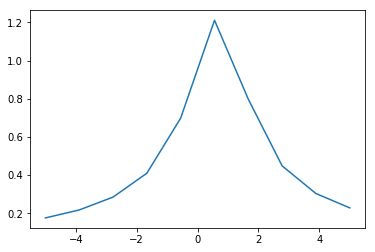

In [10]:
plt.plot(xgrid,Vx)

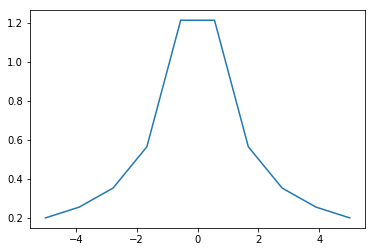

In [11]:
plt.plot(ygrid,Vy)

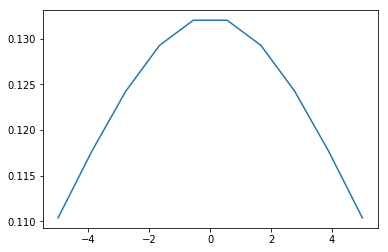

In [12]:
plt.plot(zgrid,Vz)

In [13]:
#l = len(xgrid)
#m = len(ygrid)
#n = len(zgrid)
#Ex = [[[0 for k in range(l)] for j in range(m)] for i in range(n)]
#Ey = [[[0 for k in range(l)] for j in range(m)] for i in range(n)]
#Ez = [[[0 for k in range(l)] for j in range(m)] for i in range(n)]


In [22]:
h=2*dim/points
Ex=[]
Ey=[]
Ez=[]
for i in range(points):
    for j in range(points):
        for k in range(points):
            if(i==points):
                continue
            Ex.append(-(V[i+1][j][k]-V[i][j][k])/h)
            if(j==points):
                continue
            Ey.append(-(V[i][j+1][k]-V[i][j][k])/h)
            if(k==points):
                continue
            Ez.append(-(V[i][j][k+1]-V[i][j][k])/h)


IndexError: list index out of range

In [15]:
#X=[]
#Y=[]
#Z=[]
#for i in range((points)**3):
#    if xgrid[i%points]==dim:
#        continue
#    X.append(xgrid[i%(points)])
#    Y.append(ygrid[i%(points)])
#    Z.append(zgrid[i%(points)])

    

In [ ]:
#X=[]
#Y=[]
#Z=[]
#for i in range((points-1)**3):
#    j=i%points
#    k=i%(points**2)
#    X.append(xgrid[j])

In [16]:
len(X),len(Y),len(Z),len(Ex),len(Ey),len(Ez)


(900, 900, 900, 729, 729, 729)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

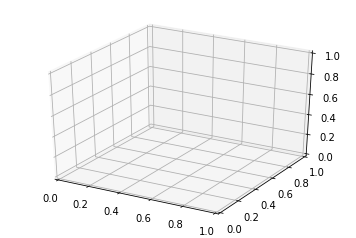

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,Ex,Ey,Ez)

These functions f2a & f2b represent the integrands for the 2 perpendicular line charges in part b

In [39]:
f2a = lambda a,b,c,x: (x**2)/numpy.sqrt((a-x)**2+b**2+c**2)
f2b = lambda a,b,c,y: y/numpy.sqrt(a**2+(b-y)**2+c**2)

In [37]:
V=Potential(f,0,1)

In [40]:
V2=Potential(f2a,0,1)+Potential(f2b,1,2)

In [42]:
f3=lambda a,b,c,x,y: x/numpy.sqrt((a-x)**2+(b-y)**2+c**2)

In [45]:
    import pprint
    l = len(xgrid)
    m = len(ygrid)
    n = len(zgrid)
    V = [[[0 for k in range(l)] for j in range(m)] for i in range(n)]
    
    for i in range(points):
        a=xgrid[i]
        for j in range(points):
            b=ygrid[j]
            for k in range(points):
                c=zgrid[k]
                g= lambda x,y: f3(a,b,c,x,y)
                vabc=sci.dblquad(g,-2,2,lambda x:-numpy.sqrt(4-x**2),lambda x: numpy.sqrt(4-x**2))[0]
                V[i][j][k]=vabc

In [47]:
Vx=[0]*points
Vy=[0]*points
Vz=[0]*points
for i in range(points):
    Vx[i]=V[i][5][5]
    Vy[i]=V[5][i][5]
    Vz[i]=V[0][0][i]

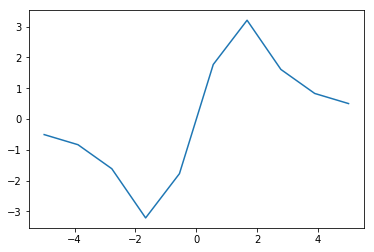

In [48]:
plt.plot(xgrid,Vx)

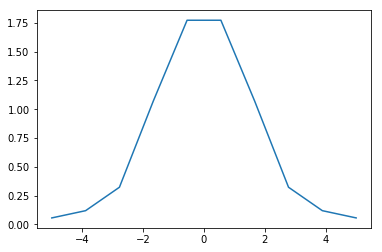

In [49]:
plt.plot(ygrid,Vy)

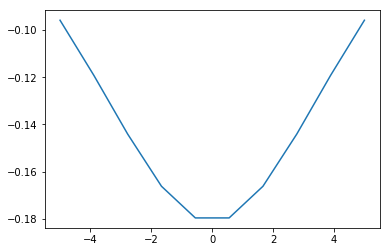

In [51]:
plt.plot(zgrid,Vz)